In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
costs_data = pd.read_csv('./lcoe_renewable_energy.csv', delimiter=";")
costs_data.set_index('year', inplace=True)
costs_data.head(15)

,lcoe usd per kwh bioenergy,lcoe usd per kwh geothermal,lcoe usd per kwh hydropower,lcoe usd per kwh solar,lcoe usd per kwh csp,lcoe usd per kwh onshore wind,lcoe usd per kwh offshore wind
year,,,,,,,
2010,0.082,0.053,0.042,0.445,0.380,0.107,0.197
2011,0.079,NaN,0.039,0.332,0.368,0.102,0.206
2012,0.068,0.091,0.041,0.248,0.357,0.093,0.175
2013,0.086,0.068,0.045,0.191,0.282,0.094,0.149
2014,0.087,0.069,0.045,0.172,0.248,0.084,0.182
2015,0.076,0.062,0.039,0.129,0.238,0.073,0.148
2016,0.075,0.071,0.052,0.113,0.281,0.067,0.123
2017,0.075,0.075,0.054,0.089,0.269,0.063,0.112
2018,0.058,0.072,0.043,0.075,0.158,0.054,0.106


In [9]:
costs_data.columns[1:]

Index(['lcoe usd per kwh geothermal', 'lcoe usd per kwh hydropower',
       'lcoe usd per kwh solar', 'lcoe usd per kwh csp',
       'lcoe usd per kwh onshore wind', 'lcoe usd per kwh offshore wind'],
      dtype='object')

In [10]:
for column in costs_data.columns[1:]:
    # multiply each column with 1000 to convert from kWh to MWh
    costs_data[column] = costs_data[column].apply(lambda x: x * 1000)

costs_data.rename(columns={"lcoe usd per kwh bioenergy": "Bioenergy", "lcoe usd per kwh geothermal": "Geothermal", "lcoe usd per kwh hydropower": "Hydropower", "lcoe usd per kwh solar": "Solar", "lcoe usd per kwh csp": "CSP", "lcoe usd per kwh onshore wind": "Onshore wind energy", "lcoe usd per kwh offshore wind": "Offshore wind energy"},
                  inplace=True)

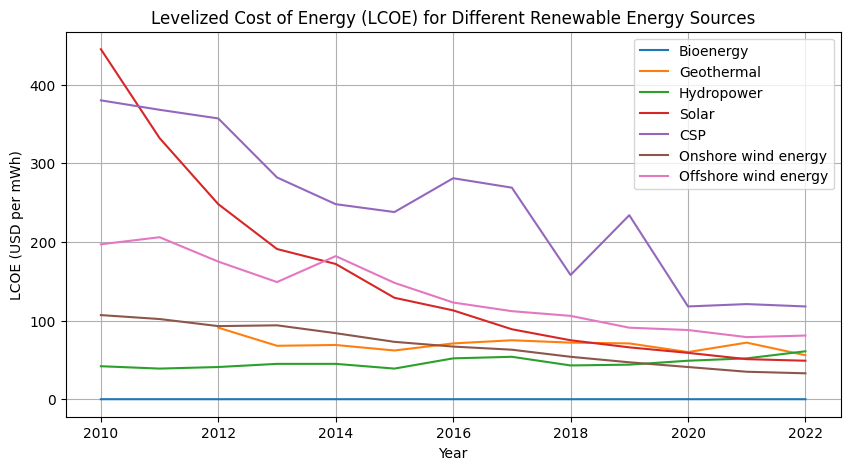

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
for column in costs_data.columns:
    ax.plot(costs_data.index, costs_data[column], label=column)

ax.set_title('Levelized Cost of Energy (LCOE) for Different Renewable Energy Sources')
ax.set_xlabel('Year')
ax.set_ylabel('LCOE (USD per mWh)')
ax.legend()
ax.grid(True)

In [12]:
capacity_data = pd.read_csv('./RECAP_20231127-154011.csv', delimiter=",")
capacity_data.head()

,Region/country/area,Technology,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,World,Hydropower,782156.806,789888.178,802804.584,823138.826,845365.282,870961.832,895007.176,926119.358,...,1137301.886,1175773.068,1210485.674,1245999.238,1270980.987,1293983.708,1312349.044,1334350.424,1362086.636,1392512.209
1,World,Renewable hydropower,697190.256,709088.628,720229.034,740451.276,761366.732,784119.282,805482.626,832419.808,...,1029572.642,1066302.324,1098583.930,1129092.454,1151137.323,1173623.544,1191742.880,1213171.500,1234382.112,1255454.185
2,World,Pumped storage,84966.550,80799.550,82575.550,82687.550,83998.550,86842.550,89524.550,93699.550,...,107729.244,109470.744,111901.744,116906.784,119843.664,120360.164,120606.164,121178.924,127704.524,137058.024
3,World,Marine,237.750,239.750,242.750,243.750,242.750,240.750,239.750,242.050,...,509.616,513.027,512.338,522.468,526.764,526.856,524.836,523.391,523.068,523.348
4,World,Wind,16964.244,23972.666,30735.013,38670.717,47684.973,58408.316,73161.274,91543.825,...,300051.920,349540.627,416421.401,467013.170,515082.306,563864.083,622779.606,733564.569,825663.023,898855.912


In [13]:
capacity_data_melted = capacity_data.melt(id_vars=['Region/country/area', 'Technology'], var_name='Year', value_name='Capacity')
capacity_data_melted['Year'] = capacity_data_melted['Year'].astype(int)
capacity_data_agg = capacity_data_melted.groupby(['Year', 'Technology']).sum().reset_index()
capacity_data_agg.head()

,Year,Technology,Region/country/area,Capacity
0,2000,Bagasse,World,4277.739
1,2000,Bioenergy,World,28428.425
2,2000,Biogas,World,2889.805
3,2000,Concentrated solar power,World,419.000
4,2000,Geothermal,World,8272.950


In [14]:
capacity_data_agg['Technology'].unique()

array(['Bagasse', 'Bioenergy', 'Biogas', 'Concentrated solar power',
       'Geothermal', 'Hydropower', 'Liquid biofuels', 'Marine',
       'Offshore wind energy', 'Onshore wind energy',
       'Other solid biofuels', 'Pumped storage', 'Renewable hydropower',
       'Renewable municipal waste', 'Solar', 'Solar photovoltaic',
       'Solid biofuels and renewable municipal waste', 'Wind'],
      dtype=object)

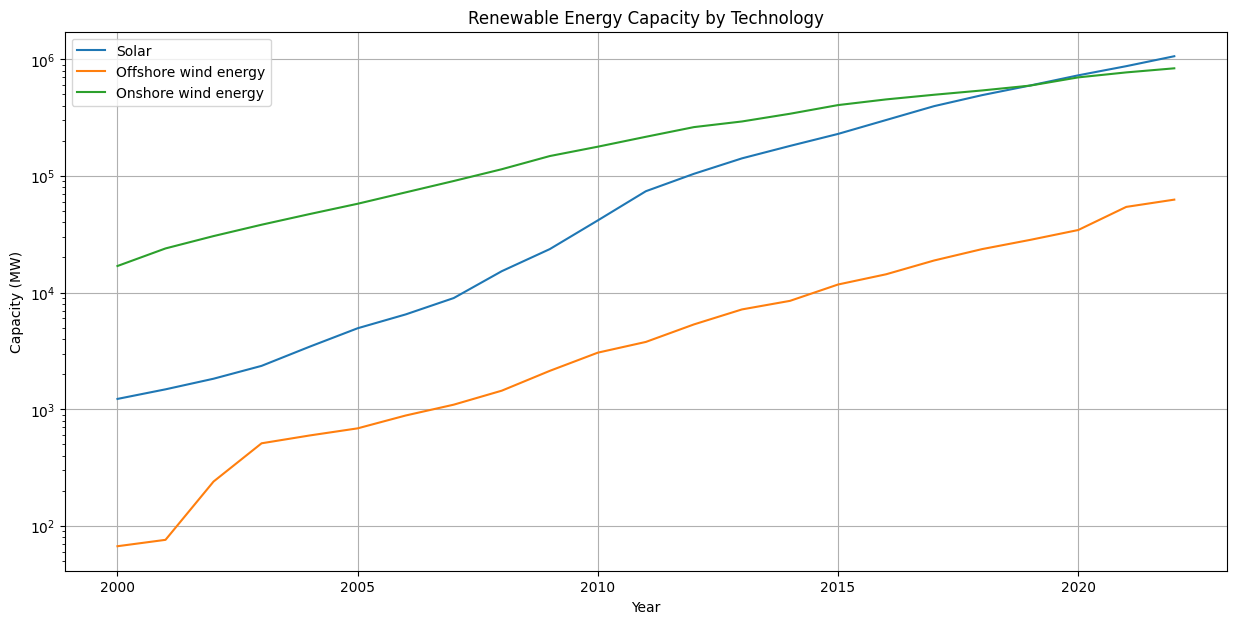

In [15]:
fig, ax = plt.subplots(figsize=(15, 7))

technologies = ["Solar", "Offshore wind energy", "Onshore wind energy"]

for tech in technologies:
    tech_data = capacity_data_agg[capacity_data_agg['Technology'] == tech]
    ax.plot(tech_data['Year'], tech_data['Capacity'], label=tech)

ax.set_title('Renewable Energy Capacity by Technology')
ax.set_xlabel('Year')
ax.set_ylabel('Capacity (MW)')
ax.legend(loc="upper left")
ax.set_yscale("log")
ax.grid(True)

In [16]:
capacity_years = [int(year) for year in capacity_data.columns[2:]]
first_common_year = max(costs_data.index.min(), min(capacity_years))
latest_common_year = min(costs_data.index.max(), max(capacity_years))

(first_common_year, latest_common_year)

(2010, 2022)

In [17]:
combined_plot_data = []
# for year in (first_common_year, latest_common_year):
for year in range(first_common_year, latest_common_year):
    for technology in technologies:
        cost = costs_data.loc[year][technology]
        capacity = capacity_data_agg.query("Technology == @technology and Year == @year")["Capacity"]
        combined_plot_data.append({"year": year, "technology": technology, "cost": cost, "capacity": int(capacity.iloc[0])})

combined_plot_data_df = pd.DataFrame(combined_plot_data)
combined_plot_data_df.head()

,year,technology,cost,capacity
0,2010,Solar,445.0,41577
1,2010,Offshore wind energy,197.0,3055
2,2010,Onshore wind energy,107.0,178034
3,2011,Solar,332.0,73940
4,2011,Offshore wind energy,206.0,3775


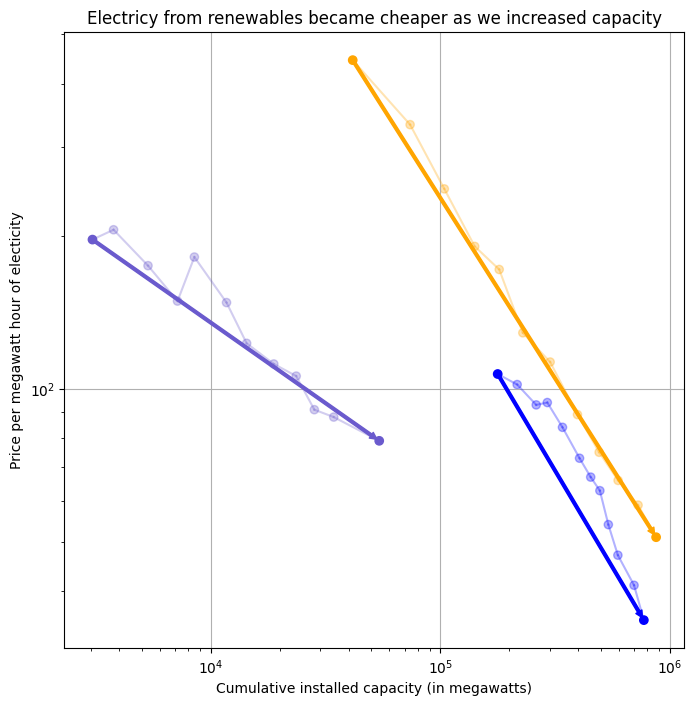

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

color_dict = { "Solar": "orange",
              "Offshore wind energy":
              "slateblue", "Onshore wind energy": "blue",
              }

for technology in technologies:
    data = combined_plot_data_df.query("technology == @technology")
    color = color_dict[technology]
    alphas = [0.3] * len(data)
    alphas[0] = 1    # highlight first point
    alphas[-1] = 1   # highlight last point

    for i in range(1, len(data)):
        ax.plot([data["capacity"].iloc[i-1], data["capacity"].iloc[i]], 
                [data["cost"].iloc[i-1], data["cost"].iloc[i]],
                color=color, alpha=0.3)

    ax.scatter(data["capacity"], data["cost"], color=color, alpha=alphas)

    # arrow from first point to last point
    ax.annotate("", xy=(data["capacity"].iloc[-1], data["cost"].iloc[-1]), 
                xytext=(data["capacity"].iloc[0], data["cost"].iloc[0]),
                arrowprops=dict(arrowstyle="simple", color=color, alpha=1))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Electricy from renewables became cheaper as we increased capacity")
ax.set_xlabel("Cumulative installed capacity (in megawatts)")
ax.set_ylabel("Price per megawatt hour of electicity")
# ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.ticklabel_format()
ax.grid(True)